In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltd
import seaborn as sns
import datetime
from timeit import default_timer
start = default_timer()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

st = default_timer()

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure



   

In [ ]:
#Importing the dat

movie = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies.dat',
                    sep='::',encoding='unicode_escape', header=None, names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ratings.dat',
                      sep='::',encoding='unicode_escape', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/users.dat',
                    sep='::',encoding='unicode_escape', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Then split the genres column by the "|" character and make each genre a new column
genres=movie['Genres'].str.split('|', expand=True).rename(columns = lambda x: "Genre"+str(x+1))
# Remove original genres column
genres.drop('Genre6',axis=1,inplace=True)
movie.drop('Genres', axis=1, inplace=True)
# Now merge movie and genres
movie = pd.merge(movie, genres, left_index=True, right_index=True, how='inner')

#Data cleaning
users.loc[users['Age'] ==1, 'Age'] = 'Under 18'
users.loc[users['Age'] ==18, 'Age'] = '18-24'
users.loc[users['Age'] ==25, 'Age'] = '25-34'
users.loc[users['Age']==35, 'Age'] = '35-44'
users.loc[users['Age'] ==45, 'Age'] = '45-49'
users.loc[users['Age'] ==50, 'Age'] = '50-55'
users.loc[users['Age']==56, 'Age'] = '56+'

users.loc[users['Occupation']==0, 'Occupation'] ="other"
users.loc[users['Occupation']==1, 'Occupation'] ="academic/educator"
users.loc[users['Occupation']==2, 'Occupation'] ="artist"
users.loc[users['Occupation']==3, 'Occupation'] ="clerical/admin"
users.loc[users['Occupation']==4, 'Occupation'] ="college/grad student"
users.loc[users['Occupation']==5, 'Occupation'] ="customer service"
users.loc[users['Occupation']==6, 'Occupation'] ="doctor/health care"
users.loc[users['Occupation']==7, 'Occupation'] ="executive/managerial"
users.loc[users['Occupation']==8, 'Occupation'] ="farmer"
users.loc[users['Occupation']==9, 'Occupation'] ="homemaker"
users.loc[users['Occupation']==10, 'Occupation']="K-12 student";
users.loc[users['Occupation']==11, 'Occupation']="lawyer";
users.loc[users['Occupation']==12, 'Occupation']="programmer";
users.loc[users['Occupation']==13, 'Occupation']="retired";
users.loc[users['Occupation']==14, 'Occupation']="sales/marketing";
users.loc[users['Occupation']==15, 'Occupation']="scientist";
users.loc[users['Occupation']==16, 'Occupation']="self-employed";
users.loc[users['Occupation']==17, 'Occupation']="technician/engineer";
users.loc[users['Occupation']==18, 'Occupation']="tradesman/craftsman";
users.loc[users['Occupation']==19, 'Occupation']="unemployed";
users.loc[users['Occupation']==20, 'Occupation']="writer";


# Organise a bit and store into feather-format
movie.sort_values(by='MovieID', inplace=True)
movie.reset_index(inplace=True, drop=True)
ratings.sort_values(by='UserID', inplace=True)
ratings.reset_index(inplace=True, drop=True)
  
# Modify rating timestamp format (from seconds to datetime year)
#ratings.Timestamp = ratings.Timestamp.map(lambda Timestamp: datetime.datetime.fromtimestamp(Timestamp).strftime('%Y-%m-%d %H:%M:%S %Z'))
#ratings.Timestamp = pd.to_datetime(ratings.Timestamp, infer_datetime_format=True)\
#               .dt.strftime('%Y-%m-%d %H:%M:%S %Z')
movie['year'] = movie.Title.str.extract("\((\d{4})\)", expand=True)
movie.Title = movie.Title.str[:-7]
#data is merged
data = pd.merge(pd.merge(ratings,movie),users)

data.reset_index(inplace=True, drop=True)
#TimeStamp Settings
data['Timestamp'] = pd.to_datetime(ratings['Timestamp'],unit='s',)
data.insert(4,"RatingYear",data.Timestamp.map(lambda x: x.year),allow_duplicates=True)
data.insert(4,"Month",data.Timestamp.map(lambda x: x.month),allow_duplicates=True)

#moviecount=pd.DataFrame(df2.groupby(["MovieID","Title"]).size())
#moviecount["Count"]=moviecount
#del moviecount[0]

#moviecount=moviecount.sort_values(by=["Count"],ascending=False)
#print(moviecount)
print(ratings)
print(movie)
print(users)
print(data)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


FileNotFoundError: ignored

In [ ]:
##Student monthwise count
df2=pd.DataFrame(data.groupby(["Occupation","Month"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Month"],inplace=True)
College=df2[df2["Occupation"]=="college/grad student"]
College=College

#plot College month
import matplotlib.pyplot as plt
fontsize=7
College=College.sort_values(by=["Count"],ascending=False)
College=College.sort_values(by=["Month"],ascending=True)
ax=College.plot(kind='bar',x="Month",y="Count",fontsize=fontsize+6)
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Month",fontsize=fontsize+5)
for x in ax.get_xticklabels():
    x.set_rotation(360)
plt.title("Monthwise number of movies watched(College Student)",fontsize=20)
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
#3 continued

#Student Genre Wise

##Student

df2=pd.DataFrame(data.groupby(["Occupation","Genres"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Genres"],inplace=True)
College=df2[df2["Occupation"]=="college/grad student"]
College=College.head(5)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=8
ax=College.plot(kind='bar',x="Genres",y="Count",fontsize=fontsize+6,title="Top 5 Genre Prefered by College Students")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()


In [ ]:
df1=pd.merge(ratings,users[['UserID','Gender','Age','Occupation']],on='UserID',how='inner')
# Modify rating timestamp format (from seconds to datetime year)
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'],unit='s',)
print(df1)

df2=pd.merge(df1[['UserID','MovieID','Rating','Gender','Age','Occupation']],movie[['MovieID','Title']],on='MovieID',
             how='inner')
print(df2)

df3=df2.sort_values(by='UserID',ascending=True)
df3.head()
print(df3)

df4=df3
df4.reset_index(drop=True,inplace=True)
df4.head(10)

movie_ratings_df = pd.merge(movie, ratings, on='MovieID')
movie_ratings_df['Timestamp'] = pd.to_datetime(movie_ratings_df['Timestamp'],unit='s',)
movie_ratings_users_df = pd.merge(
    movie_ratings_df,
    users,
    on='UserID'
)






/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

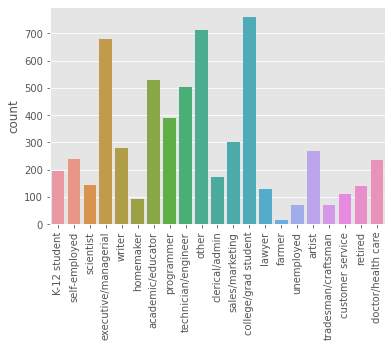

In [ ]:
#Data exploration
#Create a list for unique Occupation per userid from df4
i=1
list_occ=[]
while(i<=6040):
     a= list(df4.loc[df4['UserID']==i]['Occupation'].unique())
     list_occ = list_occ + a
     i=i+1
sns.countplot(pd.Series(list_occ))
plt.xticks(rotation=90)


['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

['Animation',
 'Drama',
 'Thriller',
 'Crime',
 'Action',
 'Sci-Fi',
 'Adventure',
 'Romance',
 'War',
 'Horror',
 'Documentary',
 'Musical',
 'Western',
 'Fantasy',
 'Mystery',
 'Comedy',
 'Film-Noir',
 "Children's"]

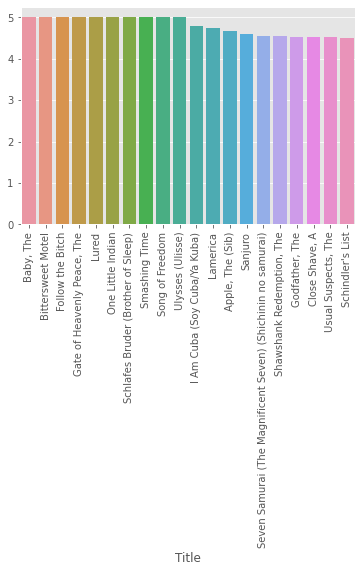

In [ ]:
#plotting
#countplot for rating
#sns.countplot(x='Rating',data=df4,hue='Gender',palette='coolwarm')
#countplot for Age
#sns.countplot(x='Age',hue='Gender',data=df4,palette='coolwarm',)


se1=df4.groupby('Title')['Rating'].agg('mean')

#visualization of top 25 movies based on rating
plot1=sns.barplot(x=se1.nlargest(20).index,y=se1.nlargest(20).values)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

movie_ratings_df['Genres'].value_counts().head()
movie_gen_list=movie['Genres'].tolist()
movie_gen_list[0:5]
movie_gen_list[1].split(sep='|')
i=0
list1=[]
while(i<3883):
    list1=list1+movie_gen_list[i].split(sep='|')
    i=i+1
print(list1)
type(list1)
set1=set(list1)
genre_list=list(set1)
genre_list



In [ ]:
moviecount=pd.DataFrame(data.groupby(["MovieID","Title"]).size())
moviecount["Count"]=moviecount
del moviecount[0]
moviecount=moviecount.sort_values(by=["Count"],ascending=False)
moviecount.head(10)


,,Count
MovieID,Title,
2858,American Beauty,3428
260,Star Wars: Episode IV - A New Hope,2991
1196,Star Wars: Episode V - The Empire Strikes Back,2990
1210,Star Wars: Episode VI - Return of the Jedi,2883
480,Jurassic Park,2672
2028,Saving Private Ryan,2653
589,Terminator 2: Judgment Day,2649
2571,"Matrix, The",2590
1270,Back to the Future,2583


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


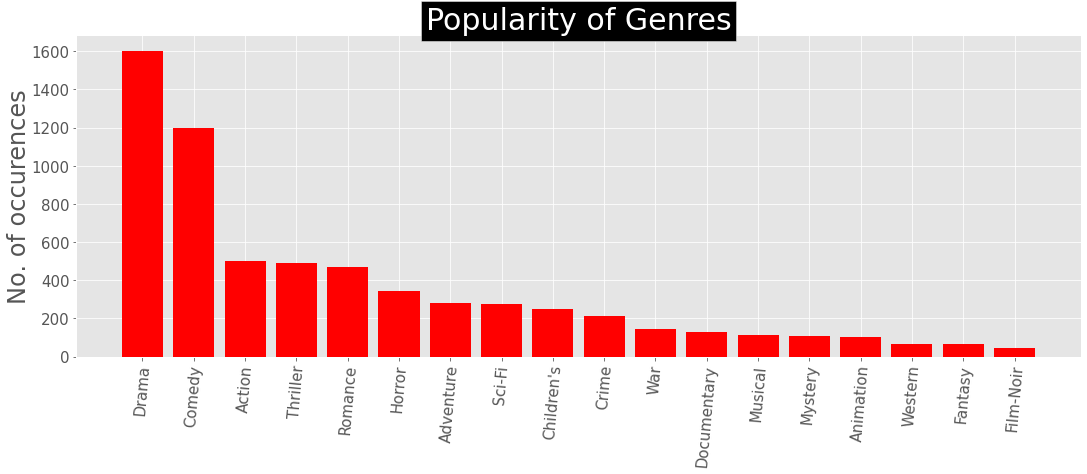

In [ ]:
#define a function that counts the number of times each genre appear:
movie= pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies.dat',
                    sep='::',encoding='unicode_escape', header=None, names=['MovieID', 'Title', 'Genres'])
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
#here we  make census of the genres:
genre_labels = set()
#here we  make census of the genres:
genre_labels = set()
for s in movie['Genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(movie, 'Genres', genre_labels)
keyword_occurences

#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [ ]:
keyword_occurences, dum = count_word(movie, 'Genres', genre_labels)
keyword_occurences[:18]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Western', 68],
 ['Fantasy', 68],
 ['Film-Noir', 44]]

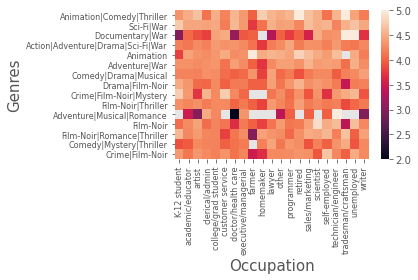

In [ ]:
#Analysis For Business Question
#Many detailed stuffed is done in Conjectures


df1 = movie_ratings_users_df.pivot_table(values='Rating', index=['Genres'],columns='Occupation', aggfunc='mean')
df1=df1.sort_values(by=["college/grad student"],ascending=False)
ax = sns.heatmap(df1.head(15))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Genres",fontsize=15)

for x in ax.get_xticklabels():
    x.set_rotation(90)
for x in ax.get_yticklabels():
    x.set_rotation(0)
plt.tight_layout()
plt.show()

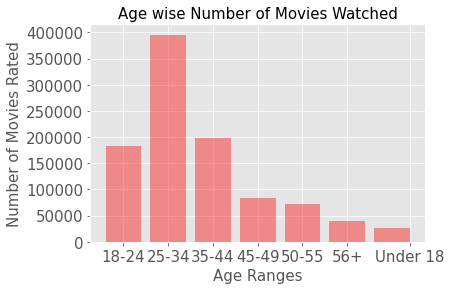

In [ ]:

#2 - Based on number of movies watched, agewise who is easy to please

##Age wise number of movies watched
df5=pd.DataFrame(movie_ratings_users_df.groupby(["Genres","Title","Age"]).size())
df5["Count"]=df5
del df5[0]
agegenre=df5
agegenre.reset_index(level=["Title","Genres","Age"], inplace=True)
df5
agegenre1=agegenre[agegenre["Age"]=='18-24']
agegenre2=agegenre[agegenre["Age"]=='25-34']
agegenre3=agegenre[agegenre["Age"]=='35-44']
agegenre4=agegenre[agegenre["Age"]=='45-49']
agegenre5=agegenre[agegenre["Age"]=='50-55']
agegenre6=agegenre[agegenre["Age"]=='56+']
agegenre7=agegenre[agegenre["Age"]=='Under 18']
agegenre1=agegenre1.sort_values(by=["Count"],ascending=False)
agegenre2=agegenre2.sort_values(by=["Count"],ascending=False)
agegenre3=agegenre3.sort_values(by=["Count"],ascending=False)
agegenre4=agegenre4.sort_values(by=["Count"],ascending=False)
agegenre5=agegenre5.sort_values(by=["Count"],ascending=False)
agegenre6=agegenre6.sort_values(by=["Count"],ascending=False)
agegenre7=agegenre7.sort_values(by=["Count"],ascending=False)




#plot age wise number of movies watched
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=8
plt.bar((1,2,3,4,5,6,7),(sum(agegenre1["Count"]),sum(agegenre2["Count"]),sum(agegenre3["Count"]),sum(agegenre4["Count"]),sum(agegenre5["Count"]),sum(agegenre6["Count"]),sum(agegenre7["Count"])), alpha=0.4,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xticks((1.0,2.0,3.0,4.0,5.0,6.0,7.4),("18-24","25-34","35-44","45-49","50-55","56+","Under 18"))
plt.xlabel('Age Ranges',fontsize=15)
plt.ylabel('Number of Movies Rated',fontsize=15)
plt.title('Age wise Number of Movies Watched',fontsize=15)
plt.show()

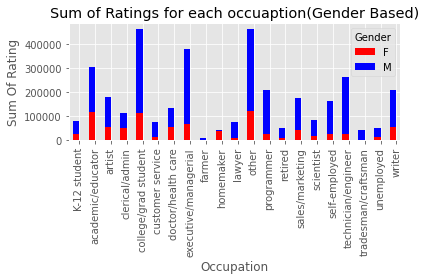

In [ ]:
df = movie_ratings_users_df.pivot_table(values='Rating', index=['Occupation'],columns='Gender', aggfunc='sum')
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=10
df.plot(kind='bar',stacked=True, color=['red','blue'], ax=ax,width=0.4, position=1,fontsize=fontsize,title="Sum of Ratings for each occuaption(Gender Based)")
ax.set_ylabel("Sum Of Rating",fontsize=fontsize+2)
ax.set_xlabel("Occupation",fontsize=fontsize+2)

plt.tight_layout()
plt.show()



In [ ]:
#Sum=0 means all are false and no duplicate values
movie['Title'].duplicated().sum()

movie['Title'].describe()

count                           3883
unique                          3883
top       Legend of Lobo, The (1962)
freq                               1
Name: Title, dtype: object

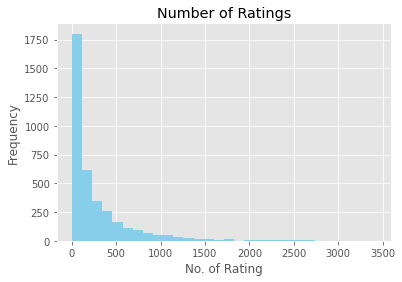

In [ ]:
movie=df1["MovieID"]
df=df1.groupby(by='MovieID').count()
avgRating=df1.groupby(by='MovieID').mean()
df["Mean"]=avgRating["Rating"]

nRatings=df["Rating"]
avRating=df["Mean"]
plt.title("Number of Ratings")
plt.xlabel("No. of Rating")
plt.ylabel("Frequency")
plt.hist(nRatings,color='skyblue',bins=30)
plt.show()

In [ ]:

#Make some conjectures about how easy various groups are to please? Support your answers with data!

#1- For which Genre does men and women tend to give high ratings(finding out Based on count of such high ratings)

#Extract data from merged file


#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=movie_ratings_users_df.groupby(["MovieID","Title","Genres","Gender"]).mean()
Groupmidgender.head()

#Ratings above 4.5 
df=pd.DataFrame(Groupmidgender)
df.reset_index(level=["Title","Genres","Gender"], inplace=True)
Rating=df[df["Rating"]>4.0]
Rating45=Rating[["Title","Genres","Gender","Rating"]]#female who rated >= 4.5

#movies rated by Male > 4.5
Ratingmen45=Rating45[Rating45["Gender"]=='M']
Ratingmen45

#movies rated by Female > 4.5
Ratingwomen45=Rating45[Rating45["Gender"]=='F']
len(Ratingwomen45)

#Count of genres with rating 4.5 and above (men)
df=pd.DataFrame(Ratingmen45.groupby("Genres").size())
df["Count(Men)"]=df
del df[0]
men45genre=df
men45genre

#Count of genres with rating 4.5 above (women)
df1=pd.DataFrame(Ratingwomen45.groupby("Genres").size())
df1["Count(Women)"]=df1
del df1[0]
women45genre=df1

#plot men vs women count for movies rating>4.5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
men45genre.plot(kind='bar', color='red', ax=ax,width=0.4, position=1,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
women45genre.plot(kind='bar', color='blue', ax=ax,width=0.4, position=0,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
ax.set_ylabel("Number of Users",fontsize=fontsize+5)
ax.set_xlabel("GENRES",fontsize=fontsize+5)

plt.tight_layout()
plt.show()

NameError: ignored

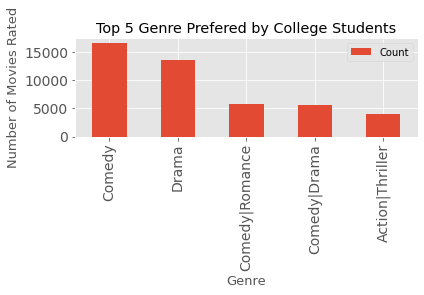

In [ ]:
#3 continued

#Student Genre Wise

##Student

df2=pd.DataFrame(data.groupby(["Occupation","Genres"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Genres"],inplace=True)
College=df2[df2["Occupation"]=="college/grad student"]
College=College.head(5)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=8
ax=College.plot(kind='bar',x="Genres",y="Count",fontsize=fontsize+6,title="Top 5 Genre Prefered by College Students")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()


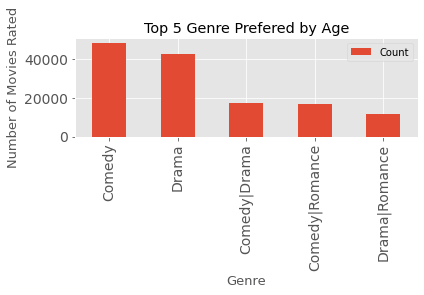

In [ ]:
#3 continued

#Age Genre Wise

##Age

df2=pd.DataFrame(data.groupby(["Age","Genres"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Age","Genres"],inplace=True)
College=df2[df2["Age"]=="25-34"]
College=College.head(5)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=8
ax=College.plot(kind='bar',x="Genres",y="Count",fontsize=fontsize+6,title="Top 5 Genre Prefered by Age Range 25-34")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()


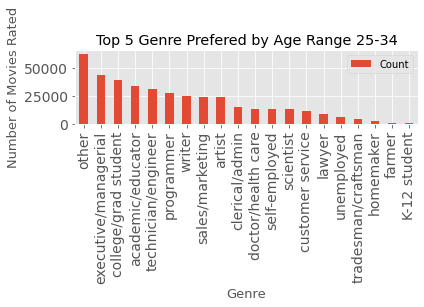

In [ ]:
df2=pd.DataFrame(data.groupby(["Occupation","Age"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Age"],inplace=True)
College=df2[df2["Age"]=="25-34"]
College=College.head(20)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=8
ax=College.plot(kind='bar',x="Occupation",y="Count",fontsize=fontsize+6,title="Occupation by Age Range 25-34")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()